In [1]:
# This is a comment.
# In this first cell, we import the modules/libraries

%matplotlib inline

#from ncam_waveforms import *
import sys
from ctapipe import utils
import matplotlib as mpl
from matplotlib import pyplot as plt
from pkg_resources import resource_filename
import os
import statistics
from matplotlib.patches import Rectangle
import random as rd

import numpy as np
from astropy.table import Table
from astropy import units as u
import math as mt
from datetime import datetime

from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry

from ctapipe_io_nectarcam import NectarCAMEventSource
from ctapipe.io import EventSource, EventSeeker

plt.rcParams['figure.figsize'] = [13, 9]

In [2]:
#Set the number of events to read
max_events = 10000

#Set the run number
run_number = str(1452)

#Define the filename
#filename='/Users/fbrun/Work/CTA/NectarCAM/Data/RandomTimes/NectarCAM.Run'+run_number+'.000[0-9].fits.fz'
filename='/local/home/ch266912/NectarCAM_Data/NectarCAM.Run'+run_number+'.000[0-9].fits.fz'    

In [3]:
reader= NectarCAMEventSource(input_url=filename, max_events=max_events)

In [4]:
nb_pixels=reader.camera_config.num_pixels
pixel_ids=reader.camera_config.expected_pixels_id
print (nb_pixels, pixel_ids)

427 [ 441  442  443  444  445  446  447  448  449  450  451  452  453  454
  455  456  457  458  459  460  461  462  463  464  465  466  467  468
  469  470  471  472  473  474  475  546  547  548  549  550  551  552
  553  554  555  556  557  558  559  560  561  562  563  564  565  566
  567  568  569  570  571  572  573  574  575  576  577  578  579  580
  581  582  583  584  585  586  587  658  659  660  661  662  663  664
  665  666  667  668  669  670  671  672  673  674  675  676  677  678
  679  680  681  682  683  684  685  686  687  688  689  690  691  692
  693  694  695  696  697  698  699  700  701  702  703  704  705  706
  777  778  779  780  781  782  783  784  785  786  787  788  789  790
  791  792  793  794  795  796  797  798  799  800  801  802  803  804
  805  806  807  808  809  810  811  812  813  814  815  816  817  818
  819  820  821  822  823  824  825  826  827  828  829  830  831  832
  896  897  898  899  900  901  902  903  904  905  906  907  908  909
  

In [5]:
mypixels=pixel_ids[203:224]
#print (mypixels)
print (mypixels)
ids= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

[917 918 919 920 921 922 923 924 925 926 927 928 929 930 931 932 933 934
 935 936 937]


In [6]:
pixelslist= mypixels.tolist()
print (pixelslist)

[917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937]


In [7]:
print (len(mypixels))
print (len(ids))

21
21


In [8]:
wvfs=[]
nb_ped=0

for p,event in enumerate (reader):
    if event.trigger.event_type == 32:
        wvfs.append(event.r0.tel[0].waveform[0, mypixels[:]])
        nb_ped+=1
 
print (nb_ped)

10000


In [9]:
type (wvfs)

list

In [10]:
wvfs= np.array(wvfs)
wvfs.shape

(10000, 21, 60)

Text(0, 0.5, 'ADC')

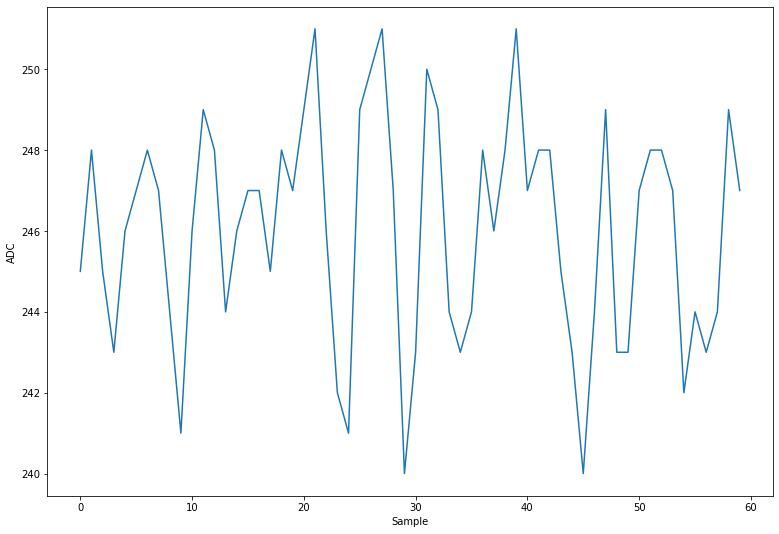

In [81]:
plt.plot (wvfs[220,12].T)
plt.xlabel ('Sample')
plt.ylabel ('ADC')

In [37]:
print (wvfs[0,1])

[256. 254. 245. 244. 251. 249. 252. 243. 244. 243. 245. 250. 252. 245.
 247. 248. 243. 249. 245. 245. 252. 251. 253. 241. 249. 253. 247. 244.
 249. 250. 247. 248. 246. 253. 248. 248. 241. 245. 245. 249. 247. 244.
 247. 254. 249. 244. 248. 254. 250. 243. 243. 252. 250. 250. 250. 247.
 245. 245. 246. 248.]


In [38]:
mean=wvfs[0,ids[:]].mean(axis=1)
print (mean)
#len(mean)

[247.86666667 247.75       247.35       246.         249.7
 246.73333333 248.93333333 247.68333333 247.21666667 248.7
 245.9        248.65       246.68333333 248.33333333 248.26666667
 248.96666667 246.78333333 245.63333333 247.93333333 246.71666667
 250.55      ]


([<matplotlib.axis.XTick at 0x7ff7ea1e7c10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

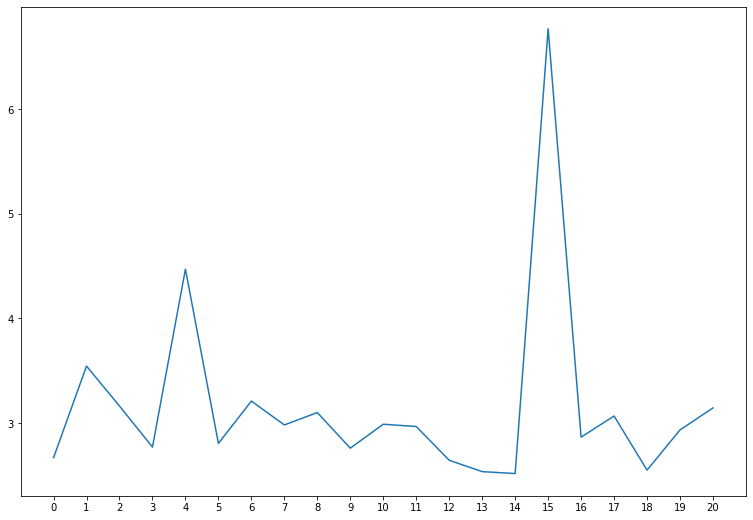

In [39]:
# Standard deviation for each pixel for the first event

stds=[]
for i in range (len(mypixels)):
    std=np.std (wvfs[0,ids[i]])
    stds.append (std)

plt.plot(stds)
plt.xticks (range (0,21))

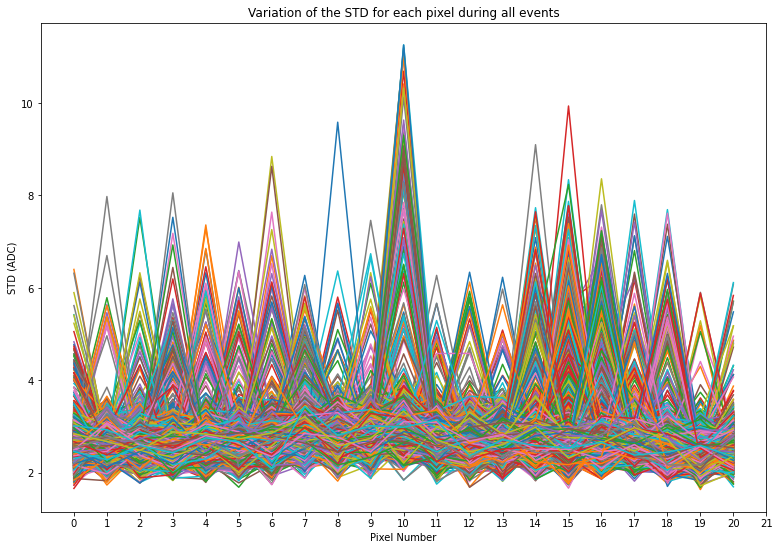

In [40]:
# Standard deviation for each pixel for all events (each color is an event)

for j in range (nb_ped):
    stds=[]
    for i in range (len(mypixels)):
        std=np.std (wvfs[j,ids[i]])
        stds.append (std)

    plt.plot(stds)
    plt.xlabel ('Pixel Number')
    plt.xticks (range (0,22))
    plt.ylabel ('STD (ADC)')
    plt.title ('Variation of the STD for each pixel during all events')

In [15]:
type (stds)

list

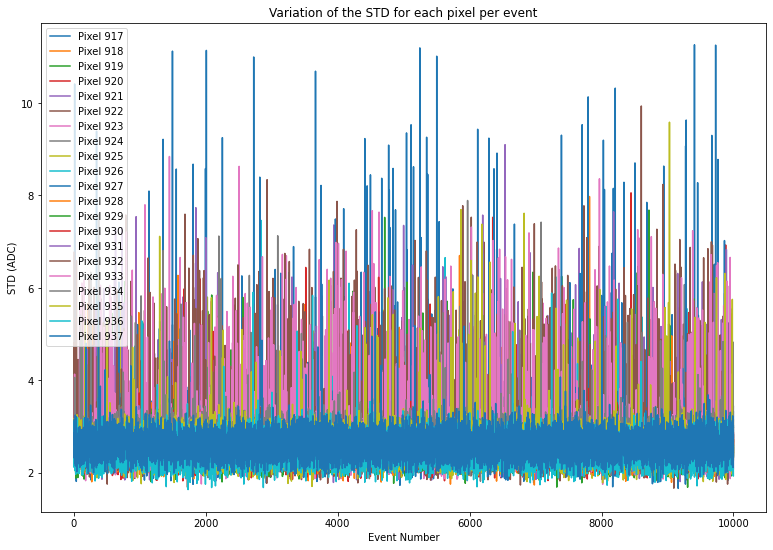

In [82]:
# This is the STD of each pixel wrt to events (each pixel is a color)

mean_stds=[]
all_stds= []
for j in range (len(mypixels)):
    stds=[]
    for i in range (nb_ped):
        std= np.std (wvfs[i,ids[j]])
        stds.append (std)
    plt.plot (stds,label= "Pixel "+str(mypixels[j]))
    plt.xlabel ('Event Number')
    plt.ylabel ('STD (ADC)')
    plt.title ('Variation of the STD for each pixel per event')
    plt.legend()
    #print ('AVG deviation for pixel', j, '=', statistics.mean(stds) )
    all_stds.append (stds)
    mean_stds.append (statistics.mean(stds))

In [83]:
type (all_stds)

list

Text(0, 0.5, 'Number of events with this STD')

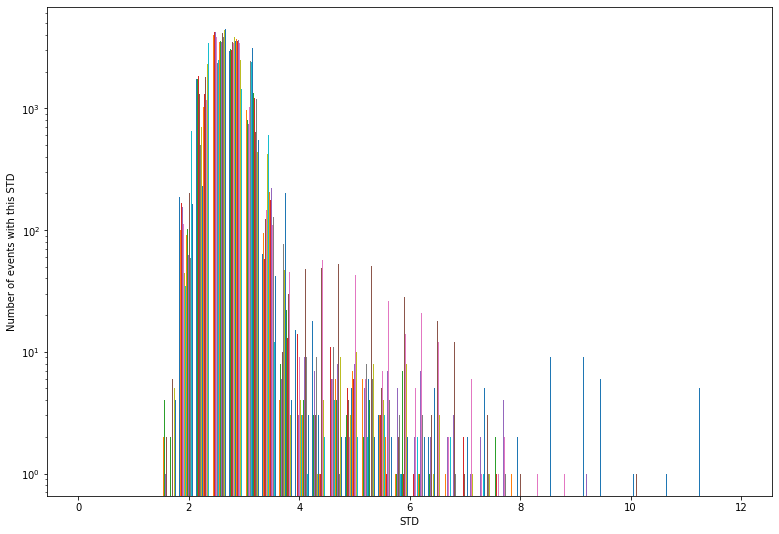

In [84]:
plt.hist (all_stds[:], bins=40, range = (0,12))
plt.yscale ('log')
plt.xlabel ('STD')
plt.ylabel ('Number of events with this STD')

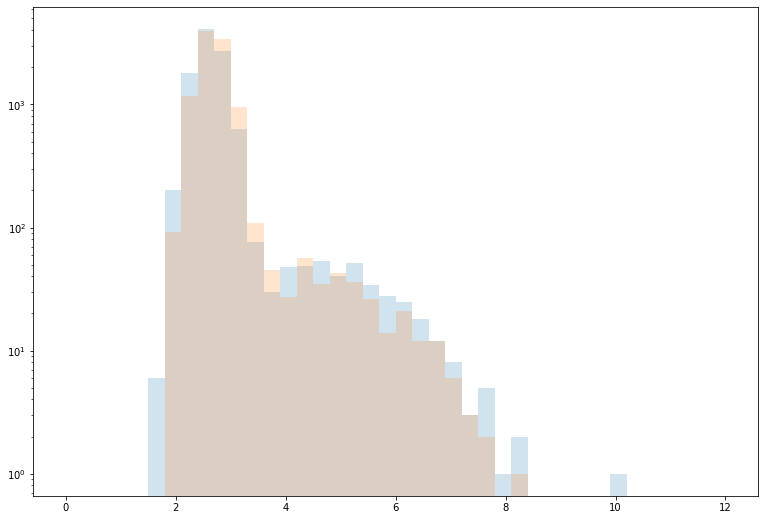

In [85]:
# STD histogram for 1 pixel
wanted_pixels=[15,16]

for i in wanted_pixels: 
    plt.hist (all_stds[i], bins=40,alpha=0.2, range =(0,12))
    plt.yscale ('log')

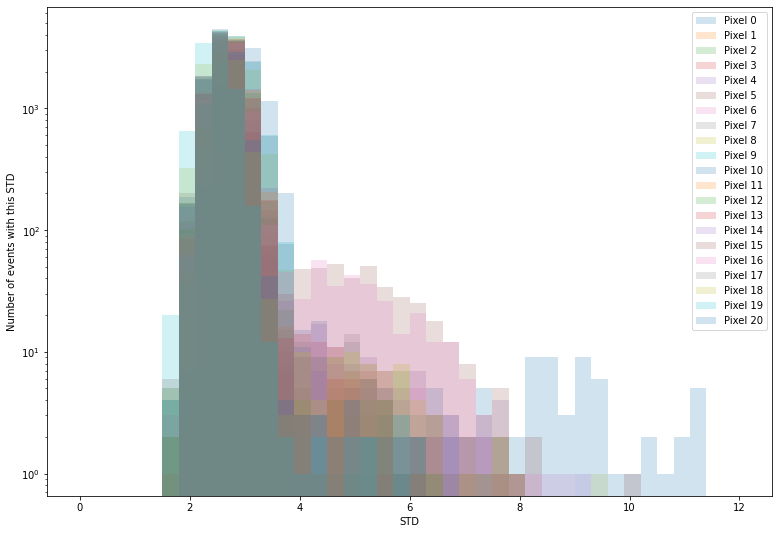

In [86]:
#Each pixel is a color 1D histogram

for i in ids:
    plt.xlabel ('STD')
    plt.ylabel ('Number of events with this STD')
    plt.hist (all_stds[i], bins= 40, alpha=0.2, range=(0,12),label= 'Pixel ' + str (ids[i]))
    plt.legend ()
    plt.yscale ('log')

In [87]:
all_stds= np.array (all_stds)
new_stds=[]
for i in ids:
    for j in range (nb_ped):
        new_stds.append (all_stds[i,j])
print (len(new_stds))

210000


In [88]:
print (all_stds)

[[2.66749987 2.42275096 2.69876515 ... 2.53837218 2.8430715  2.46215804]
 [3.54318595 2.84189882 2.45826271 ... 2.74646237 2.67810049 2.28394152]
 [3.16135519 2.60256284 2.62593899 ... 2.66437401 2.48439575 2.58902599]
 ...
 [2.54863798 2.38391601 2.38810711 ... 2.17076535 2.72412065 2.44948974]
 [2.93309658 2.12204042 2.4186199  ... 2.16948535 1.92959409 2.59159968]
 [3.14337929 2.60826677 2.75600355 ... 2.76581312 2.36854386 2.34852199]]


In [89]:
y= np.array (all_stds)
for i in ids:
    y[i,:]=i
new_y =[]
for i in ids:
    for j in range (nb_ped):
        new_y.append (y[i,j])
print (len(new_y))

210000


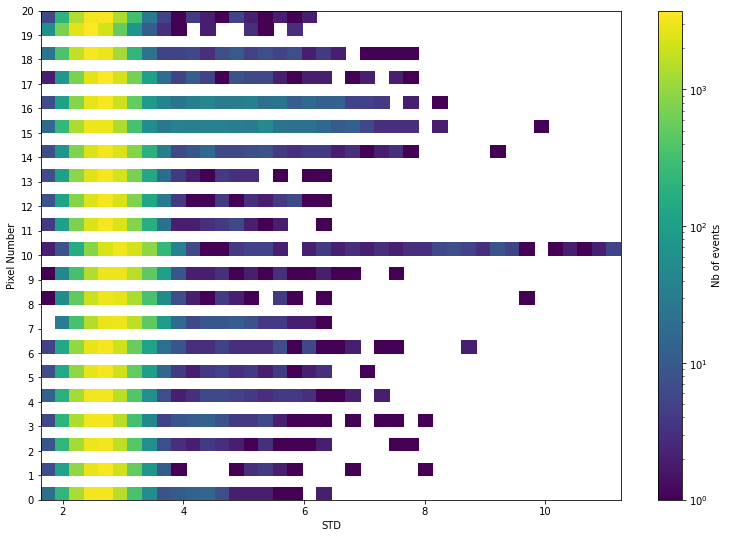

In [90]:
# 2D histogram for all pixels

plt.hist2d(new_stds,new_y,bins= (40,40),norm=mpl.colors.LogNorm())

#plt.hist2d(new_stds,new_y,bins= (40,40))

plt.xlabel ('STD')
plt.yticks (ids)
plt.ylabel ('Pixel Number')
plt.colorbar(label='Nb of events')
plt.show()

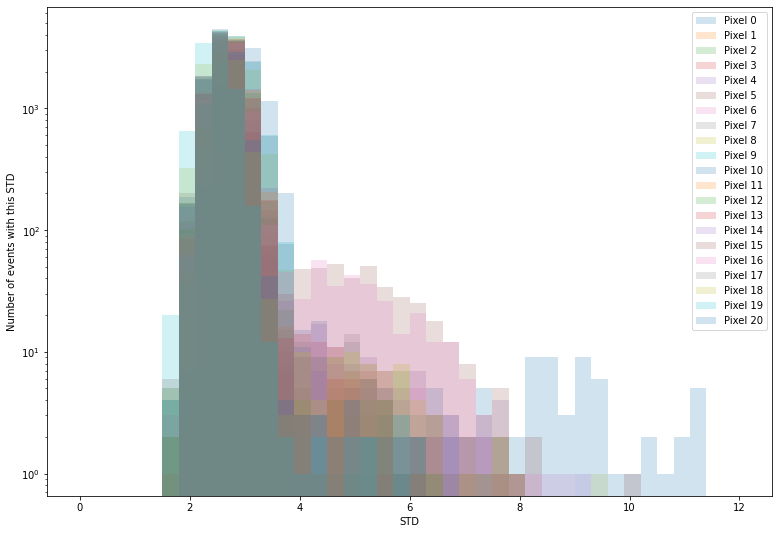

In [91]:
for i in ids:
    plt.xlabel ('STD')
    plt.ylabel ('Number of events with this STD')
    plt.hist (all_stds[i], bins= 40, alpha=0.2, range=(0,12),label= 'Pixel ' + str (ids[i]))
    plt.legend ()
    plt.yscale ('log')

In [17]:
print (mean_stds)

[2.632137260759402, 2.681504905250967, 2.6422083771621208, 2.631275473272507, 2.644537413108355, 2.687938550341341, 2.694880907798208, 2.87727217650751, 2.81236259133803, 2.8666690572233056, 3.014512248091665, 2.734126714333273, 2.724531529822596, 2.7076469937799175, 2.7567355932705095, 2.714458062756479, 2.760524678619252, 2.7238544779714653, 2.5832301350892712, 2.4634064296157385, 2.612400915271253]


In [92]:
deviations=[]
for k in range (1855):
    if k in mypixels:
        dev= np.std(wvfs[:,pixelslist.index(k)])
        deviations.append (dev)
    else:
        dev=0
        deviations.append(dev)

deviations= [deviations]
deviations= np.array(deviations)
deviations.shape
#print (deviations)
#print (deviations)

(1, 1855)

In [93]:
wvfs[0,:].shape


(21, 60)

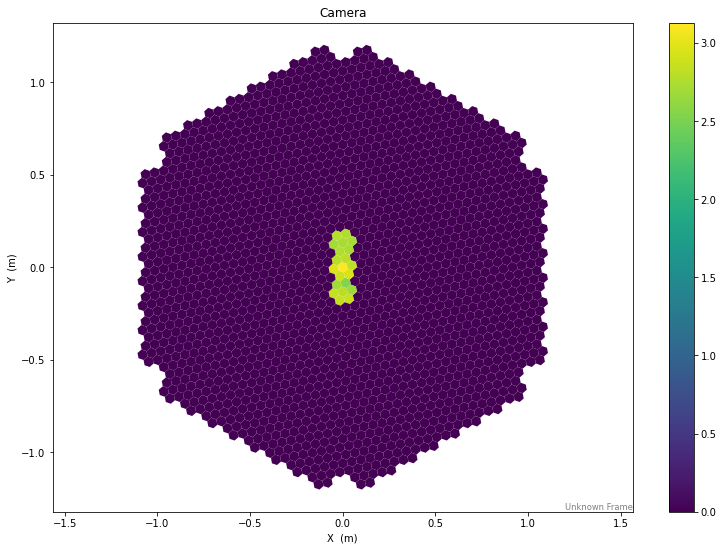

In [94]:
# Let's have a look at this in the camera
geom = CameraGeometry.from_name("NectarCam-003")
geom.rotate(90*u.deg)

disp = CameraDisplay(geom,title="Camera")
disp.image= deviations.mean(axis=0)

#disp.image = wvfs[0,0,:].mean(axis=1)
disp.add_colorbar()
#disp.set_limits_minmax(240,255)

In [95]:
# DOUBLE STD ON 21 PIXELS

double_stds=[]
for k in range (1855):
    if k in mypixels:
        dev= np.std(all_stds[pixelslist.index(k)])
        double_stds.append (dev)
    else:
        dev=0
        double_stds.append(dev)

double_stds=[double_stds]
double_stds= np.array (double_stds)

In [96]:
double_stds.shape

(1, 1855)

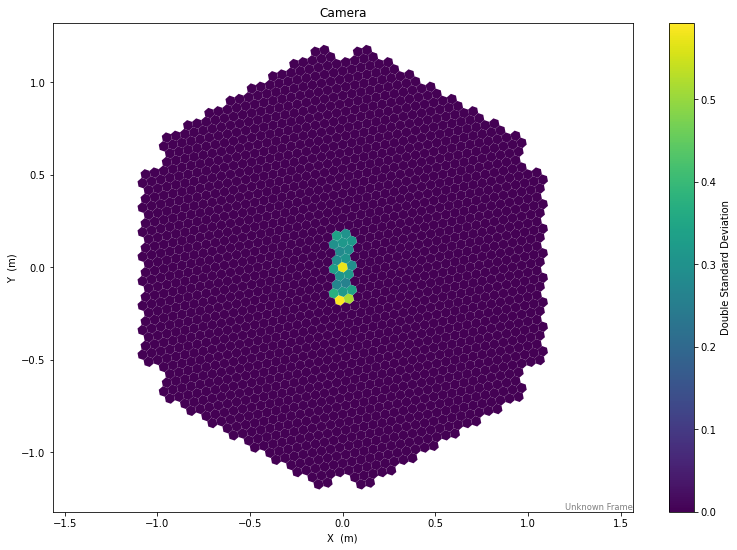

In [97]:
geom = CameraGeometry.from_name("NectarCam-003")
geom.rotate(90*u.deg)

disp = CameraDisplay(geom,title="Camera")
disp.image= double_stds.mean(axis=0)

#disp.image = wvfs[0,0,:].mean(axis=1)
disp.add_colorbar(label="Double Standard Deviation")
#disp.set_limits_minmax(240,255)